#Librerias necesarias

In [1]:
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
import timeit

#Funciones dadas en clase que se usarán

In [2]:
def SubMat(Mat, ren, col):
    """
    Crea una submatriz eliminando un renglón y una columna específicos de la matriz original.

    Parámetros:
    -----------
    Mat : numpy.ndarray
        Matriz original de la cual se obtendrá la submatriz.
    ren : int
        Índice del renglón que se eliminará de la matriz.
    col : int
        Índice de la columna que se eliminará de la matriz.

    Retorna:
    --------
    numpy.ndarray
        Submatriz resultante después de eliminar el renglón y la columna especificados.

    Ejemplo:
    --------
    >>> Mat = np.array([[1, 2, 3],
    ...                [4, 5, 6],
    ...                [7, 8, 9]])
    >>> SubMat(Mat, 1, 1)
    array([[1, 3],
           [7, 9]])
    """
    # Crear una copia de la matriz original para no modificarla
    M1 = np.copy(Mat)

    # Eliminar el renglón especificado
    M1 = np.delete(M1, ren, axis=0)

    # Eliminar la columna especificada
    M1 = np.delete(M1, col, axis=1)

    return M1


In [3]:
def Det(Mat):
    """
    Calcula el determinante de una matriz cuadrada de manera recursiva.

    Parámetros:
    -----------
    Mat : numpy.ndarray
        Matriz cuadrada de la cual se calculará el determinante.
        Debe ser de tamaño n x n, donde n >= 2.

    Retorna:
    --------
    float
        El determinante de la matriz.

    Ejemplo:
    --------
    >>> Mat = np.array([[1, 2],
    ...                [3, 4]])
    >>> Det(Mat)
    -2.0

    >>> Mat = np.array([[6, 1, 1],
    ...                [4, -2, 5],
    ...                [2, 8, 7]])
    >>> Det(Mat)
    -306.0
    """
    # Caso base: matriz 2x2
    if Mat.shape[0] == 2 and Mat.shape[1] == 2:
        return Mat[0][0] * Mat[1][1] - (Mat[0][1] * Mat[1][0])

    # Caso recursivo: matrices más grandes
    deter = 0.0
    for col in range(Mat.shape[0]):
        # Calcula el cofactor y suma al determinante
        deter += ((-1) ** col) * Mat[0][col] * Det(SubMat(Mat, 0, col))
    return deter

In [4]:
def Transpuesta(Mat):
    """
    Calcula la transpuesta de una matriz cuadrada modificando la matriz original.

    Parámetros:
    -----------
    Mat : numpy.ndarray
        Matriz cuadrada de tamaño n x n que se transpondrá.
        La matriz se modificará in situ.

    Retorna:
    --------
    numpy.ndarray
        La matriz transpuesta. La matriz original también se modifica.

    Ejemplo:
    --------
    >>> Mat = np.array([[1, 2, 3],
    ...                [4, 5, 6],
    ...                [7, 8, 9]])
    >>> Transpuesta(Mat)
    array([[1, 4, 7],
           [2, 5, 8],
           [3, 6, 9]])
    """
    for ren in range(Mat.shape[0]):
        for col in range(Mat.shape[1]):
            if ren < col:
                # Intercambia los elementos para obtener la transpuesta
                Mat[ren, col], Mat[col, ren] = Mat[col, ren], Mat[ren, col]
    return Mat

In [5]:
def Cofactores(Mat):
    """
    Calcula la matriz de cofactores de una matriz cuadrada.

    Parámetros:
    -----------
    Mat : numpy.ndarray
        Matriz cuadrada de tamaño n x n para la cual se calcularán los cofactores.

    Retorna:
    --------
    numpy.ndarray
        Matriz de cofactores, donde cada elemento es el cofactor correspondiente
        de la matriz original.

    Ejemplo:
    --------
    >>> Mat = np.array([[1, 2],
    ...                [3, 4]])
    >>> Cofactores(Mat)
    array([[ 4., -3.],
           [-2.,  1.]])
    """
    # Crear una matriz de ceros del mismo tamaño que Mat para almacenar los cofactores
    Cofa = np.zeros_like(Mat, dtype=float)

    # Calcular el cofactor para cada elemento de la matriz
    for ren in range(Mat.shape[0]):
        for col in range(Mat.shape[1]):
            # Calcular el determinante de la submatriz (menor) y aplicar el signo
            Cofa[ren, col] = ((-1) ** (ren + col)) * Det(SubMat(Mat, ren, col))
    return Cofa

In [6]:
def Inv(Mat):
    """
    Calcula la inversa de una matriz cuadrada utilizando la matriz de cofactores.

    Parámetros:
    -----------
    Mat : numpy.ndarray
        Matriz cuadrada de tamaño n x n que se invertirá.
        Debe ser una matriz no singular (su determinante debe ser distinto de cero).

    Retorna:
    --------
    numpy.ndarray
        La matriz inversa de la matriz original.

    Ejemplo:
    --------
    >>> Mat = np.array([[4, 7],
    ...                [2, 6]])
    >>> Inv(Mat)
    array([[ 0.6, -0.7],
           [-0.2,  0.4]])
    """
    # Calcular el determinante de la matriz
    deter = Det(Mat)

    # Verificar si la matriz es singular (determinante = 0)
    if deter == 0:
        raise ValueError("La matriz es singular y no tiene inversa.")

    # Calcular la matriz de cofactores
    Cofac = Cofactores(Mat)

    # Transponer la matriz de cofactores para obtener la matriz adjunta
    Cofac = Transpuesta(Cofac)

    # Calcular la inversa multiplicando la adjunta por 1/determinante
    Inversa = (1 / deter) * Cofac

    return Inversa

In [7]:
def SolveInv(Mat, vec):
    """
    Resuelve un sistema de ecuaciones lineales utilizando la matriz inversa.

    Parámetros:
    -----------
    Mat : numpy.ndarray
        Matriz cuadrada de coeficientes del sistema de ecuaciones.
        Debe ser una matriz no singular (su determinante debe ser distinto de cero).

    vec : numpy.ndarray
        Vector de términos independientes.
        Su tamaño debe coincidir con el número de filas de la matriz `Mat`.

    Retorna:
    --------
    numpy.ndarray
        Vector solución del sistema de ecuaciones `Mat @ x = vec`.

    Excepciones:
    ------------
    ValueError
        Se lanza un error si la matriz `Mat` no es invertible.

    Ejemplo:
    --------
    >>> Mat = np.array([[2, 1],
    ...                 [5, 3]])
    >>> vec = np.array([4, 10])
    >>> SolveInv(Mat, vec)
    array([2., 0.])

    """
    # Calcular la inversa de la matriz
    InvMat = Inv(Mat)

    # Multiplicar la inversa por el vector de términos independientes
    Solucion = InvMat @ vec

    return Solucion

In [8]:
def SolverDiagonal(A, b):
    """
    Resuelve un sistema de ecuaciones lineales donde la matriz A es diagonal.

    Esta función resuelve el sistema de ecuaciones Ax = b, donde A es una matriz diagonal
    representada por su diagonal principal (un vector). La solución se obtiene dividiendo
    cada elemento del vector b por el correspondiente elemento de la diagonal de A.

    Parámetros:
    -----------
    A : array_like
        Un arreglo unidimensional que representa la diagonal principal de la matriz A.
        Debe tener la misma longitud que el vector b.

    b : array_like
        Un arreglo unidimensional que representa el vector de términos independientes del sistema.

    Retorna:
    --------
    x : ndarray
        Un arreglo unidimensional que contiene la solución del sistema Ax = b.

    Ejemplo:
    --------
    >>> A = np.array([2, 4, 6])  # Diagonal principal de la matriz A
    >>> b = np.array([8, 16, 36])  # Vector de términos independientes
    >>> x = SolverDiagonal(A, b)
    >>> print(x)
    [4. 4. 6.]

    Notas:
    ------
    - La función asume que la matriz A es diagonal y que no hay elementos fuera de la diagonal.
    - Si algún elemento de la diagonal A es cero, se producirá un error de división por cero.
    """
    n = len(A)
    x = np.zeros_like(A, dtype=float)  # Asegura que x sea de tipo flotante
    for i in range(n):
        x[i] = b[i] / A[i]
    return x

In [9]:
def SustitucionDelante(Mat, b):
    """
    Realiza la sustitución hacia adelante para resolver un sistema de ecuaciones lineales
    representado por una matriz triangular inferior.

    Parámetros:
    -----------
    Mat : numpy.ndarray
        Una matriz triangular inferior de tamaño n x n.
    b : numpy.ndarray
        Un vector de términos independientes de tamaño n.

    Retorna:
    --------
    x : numpy.ndarray
        Un vector solución de tamaño n que satisface la ecuación Mat @ x = b.

    Descripción:
    ------------
    Esta función resuelve un sistema de ecuaciones lineales de la forma Mat @ x = b,
    donde Mat es una matriz triangular inferior. Utiliza el método de sustitución hacia adelante,
    comenzando desde la primera fila de la matriz y avanzando hacia la última.

    Ejemplo:
    --------
    >>> Mat = np.array([[1, 0, 0],
    ...                 [2, 3, 0],
    ...                 [4, 5, 6]])
    >>> b = np.array([1, 8, 32])
    >>> SustitucionDelante(Mat, b)
    array([1., 2., 3.])
    """
    n = Mat.shape[0]
    x = np.zeros(n)

    for i in range(n):
        SumCum = 0.0
        for j in range(i):
            SumCum += Mat[i, j] * x[j]
        x[i] = (b[i] - SumCum) / Mat[i, i]

    return x

In [10]:
def SustitucionAtras(Mat, b):
    """
    Realiza la sustitución hacia atrás para resolver un sistema de ecuaciones lineales
    representado por una matriz triangular superior.

    Parámetros:
    -----------
    Mat : numpy.ndarray
        Una matriz triangular superior de tamaño n x n.
    b : numpy.ndarray
        Un vector de términos independientes de tamaño n.

    Retorna:
    --------
    x : numpy.ndarray
        Un vector solución de tamaño n que satisface la ecuación Mat @ x = b.

    Descripción:
    ------------
    Esta función resuelve un sistema de ecuaciones lineales de la forma Mat @ x = b,
    donde Mat es una matriz triangular superior. Utiliza el método de sustitución hacia atrás,
    comenzando desde la última fila de la matriz y avanzando hacia la primera.

    Ejemplo:
    --------
    >>> Mat = np.array([[3, 2, 1],
    ...                 [0, 2, 1],
    ...                 [0, 0, 1]])
    >>> b = np.array([6, 4, 1])
    >>> SustitucionAtras(Mat, b)
    array([1., 1., 1.])
    """
    n = Mat.shape[0]
    x = np.zeros(n)

    for i in range(n-1, -1, -1):
        SumCum = 0.0
        for j in range(i+1, n):
            SumCum += Mat[i, j] * x[j]
        x[i] = (b[i] - SumCum) / Mat[i, i]

    return x

In [11]:
# Tamaño de la matriz
n = 5

# Crear la diagonal principal
DP=2*np.ones(n)
diagonal_principal = np.diag(DP)

# Crear la diagonal superior
DS=-np.ones(n-1)
diagonal_superior = np.diag(DS, k=1)

# Crear la diagonal inferior
DI=-np.ones(n-1)
diagonal_inferior = np.diag(DI, k=-1)

# Sumar las tres diagonales para obtener la matriz tribanda
matriz_tribanda = diagonal_principal + diagonal_superior + diagonal_inferior
print(matriz_tribanda)

b=np.ones(n)

[[ 2. -1.  0.  0.  0.]
 [-1.  2. -1.  0.  0.]
 [ 0. -1.  2. -1.  0.]
 [ 0.  0. -1.  2. -1.]
 [ 0.  0.  0. -1.  2.]]


In [12]:
def Thomas(DP,DS,DI,b):
  n=len(DP)
  x=np.zeros(n)

  for i in range(1,n):
    DP[i]=DP[i]-(DI[i-1]/DP[i-1])*DS[i-1]


  x[-1]=b[-1]/DP[-1]

  for i in range(n-2,-1,-1):
    x[i]=(b[i]-DS[i]*x[i+1])/DP[i]
  return x

#Funcion para medir el tiempo

In [13]:
def Tiempo(nombre_funcion, n):
    """
    Mide el tiempo de ejecución de la función especificada para un tamaño n.

    Parámetros:
    -----------
    nombre_funcion : str
        Nombre de la función a medir.
    n : int
        Tamaño de la matriz o vector según corresponda.

    Retorna:
    --------
    float
        Tiempo de ejecución en segundos.
    """
    if nombre_funcion == 'Det':
        M = np.random.rand(n, n)
        return timeit.timeit(lambda: Det(M), number=1)
    elif nombre_funcion == 'SolveInv':
        M = np.random.rand(n, n) + np.eye(n)
        vec = np.random.rand(n)
        return timeit.timeit(lambda: SolveInv(M, vec), number=1)
    elif nombre_funcion == 'SustitucionAtras':
        M = np.triu(np.random.rand(n, n))
        np.fill_diagonal(M, np.where(np.diag(M) == 0, 1.0, np.diag(M)))
        vec = np.random.rand(n)
        return timeit.timeit(lambda: SustitucionAtras(M, vec), number=1)
    elif nombre_funcion == 'SustitucionDelante':
        M = np.tril(np.random.rand(n, n))
        np.fill_diagonal(M, np.where(np.diag(M) == 0, 1.0, np.diag(M)))
        vec = np.random.rand(n)
        return timeit.timeit(lambda: SustitucionDelante(M, vec), number=1)
    elif nombre_funcion == 'SolverDiagonal':
        diag = np.random.rand(n)
        diag = np.where(diag == 0, 1.0, diag)
        vec = np.random.rand(n)
        return timeit.timeit(lambda: SolverDiagonal(diag, vec), number=1)
    elif nombre_funcion == 'Thomas':
        DP = np.random.rand(n) + 1.0
        DS = np.random.rand(n - 1)
        DI = np.random.rand(n - 1)
        b = np.random.rand(n)
        return timeit.timeit(lambda: Thomas(DP, DS, DI, b), number=1)
    else:
        return None

#Realizamos las gráficas
En este caso se redujo el tamaño de ejecucion para las funciones Det y SolveInv, ya que requerian mucho tiempo para ejecutarse y no era viable

##Det

<ipython-input-14-fd22d114e0ca>:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


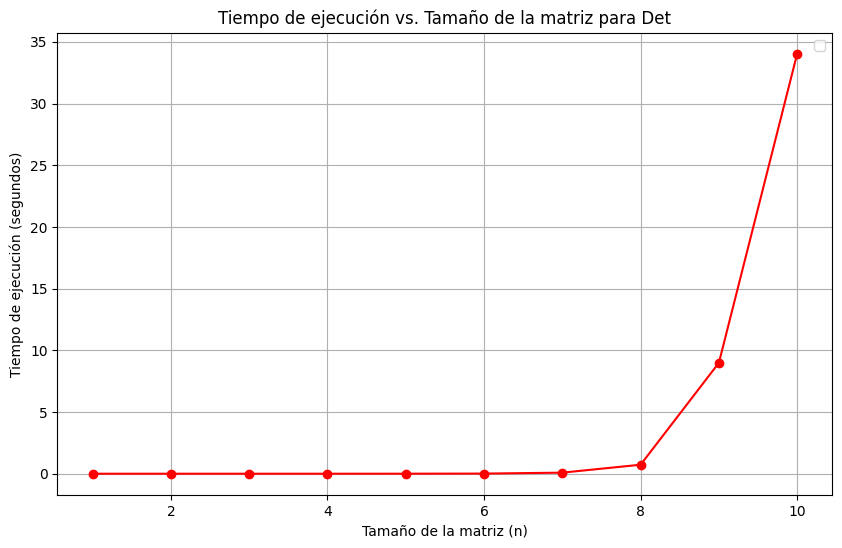

In [14]:
funcion = 'Det'

tamaños = []
tiempos = []
for n in range(1, 11):
    try:
        t = Tiempo(funcion, n)
        tamaños.append(n)
        tiempos.append(t)
    except Exception:
        tamaños.append(n)
        tiempos.append(None)

plt.figure(figsize=(10, 6))
tamaños_validos = [n for n, t in zip(tamaños, tiempos) if t is not None]
tiempos_validos = [t for t in tiempos if t is not None]
plt.plot(tamaños_validos, tiempos_validos, marker='o', color='red')
plt.xlabel("Tamaño de la matriz (n)")
plt.ylabel("Tiempo de ejecución (segundos)")
plt.title("Tiempo de ejecución vs. Tamaño de la matriz para " + funcion)
plt.legend()
plt.grid(True)
plt.show()

##SolveInv

<ipython-input-15-b3a399220bef>:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


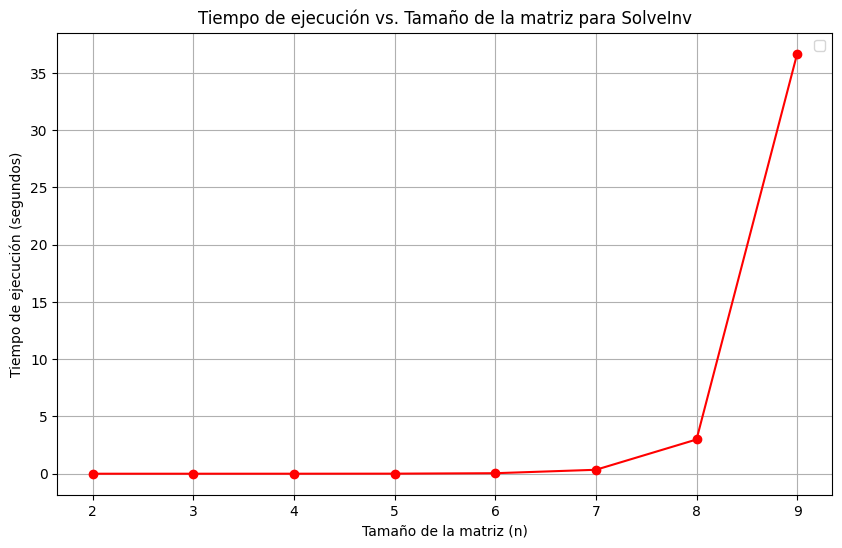

In [15]:
funcion = 'SolveInv'

tamaños = []
tiempos = []
for n in range(1, 10):
    try:
        t = Tiempo(funcion, n)
        tamaños.append(n)
        tiempos.append(t)
    except Exception:
        tamaños.append(n)
        tiempos.append(None)

plt.figure(figsize=(10, 6))
tamaños_validos = [n for n, t in zip(tamaños, tiempos) if t is not None]
tiempos_validos = [t for t in tiempos if t is not None]
plt.plot(tamaños_validos, tiempos_validos, marker='o', color='red')
plt.xlabel("Tamaño de la matriz (n)")
plt.ylabel("Tiempo de ejecución (segundos)")
plt.title("Tiempo de ejecución vs. Tamaño de la matriz para " + funcion)
plt.legend()
plt.grid(True)
plt.show()

##SustitucionAtras

<ipython-input-16-59dc9f388665>:22: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


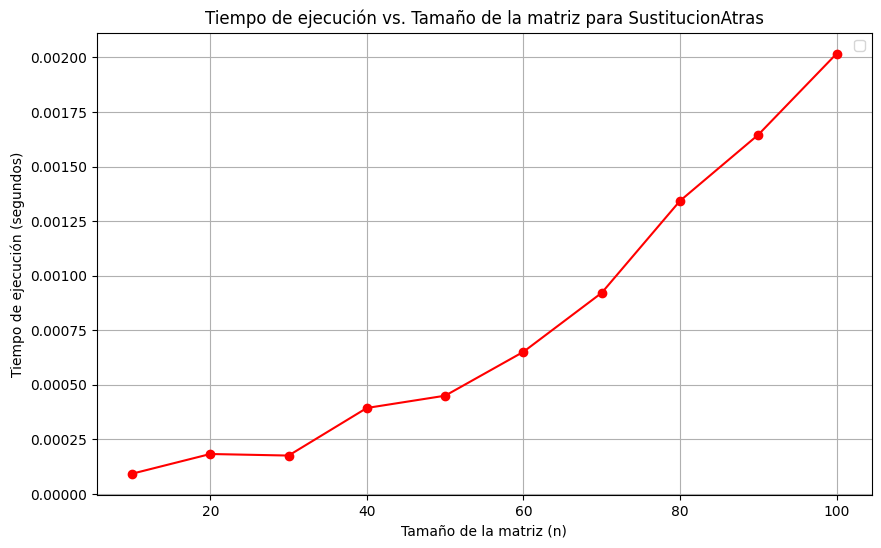

In [16]:
funcion = 'SustitucionAtras'

tamaños = []
tiempos = []
for n in range(10, 101, 10):
    try:
        t = Tiempo(funcion, n)
        tamaños.append(n)
        tiempos.append(t)
    except Exception:
        tamaños.append(n)
        tiempos.append(None)

plt.figure(figsize=(10, 6))
# Filtrar los valores válidos
tamaños_validos = [n for n, t in zip(tamaños, tiempos) if t is not None]
tiempos_validos = [t for t in tiempos if t is not None]
plt.plot(tamaños_validos, tiempos_validos, marker='o', color='red')
plt.xlabel("Tamaño de la matriz (n)")
plt.ylabel("Tiempo de ejecución (segundos)")
plt.title("Tiempo de ejecución vs. Tamaño de la matriz para " + funcion)
plt.legend()
plt.grid(True)
plt.show()

##SustitucionDelante

<ipython-input-17-827024b5ba45>:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


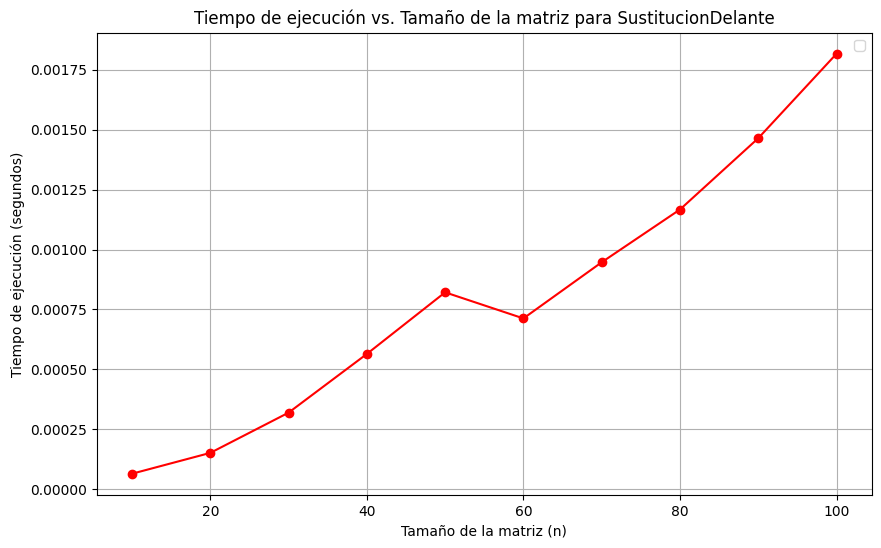

In [17]:
funcion = 'SustitucionDelante'

tamaños = []
tiempos = []
for n in range(10, 101, 10):
    try:
        t = Tiempo(funcion, n)
        tamaños.append(n)
        tiempos.append(t)
    except Exception:
        tamaños.append(n)
        tiempos.append(None)

plt.figure(figsize=(10, 6))
tamaños_validos = [n for n, t in zip(tamaños, tiempos) if t is not None]
tiempos_validos = [t for t in tiempos if t is not None]
plt.plot(tamaños_validos, tiempos_validos, marker='o', color='red')
plt.xlabel("Tamaño de la matriz (n)")
plt.ylabel("Tiempo de ejecución (segundos)")
plt.title("Tiempo de ejecución vs. Tamaño de la matriz para " + funcion)
plt.legend()
plt.grid(True)
plt.show()


##SolverDiagonal

<ipython-input-18-c68e635559b1>:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


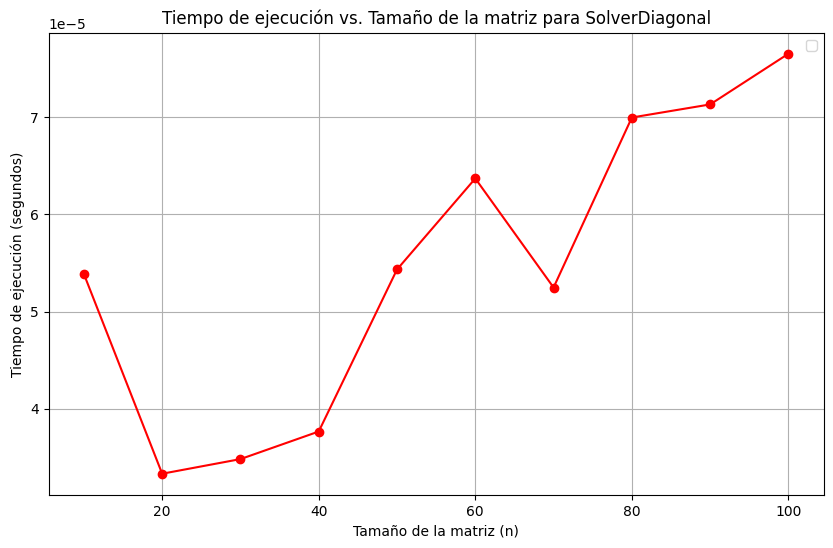

In [18]:
funcion = 'SolverDiagonal'

tamaños = []
tiempos = []
for n in range(10, 101, 10):
    try:
        t = Tiempo(funcion, n)
        tamaños.append(n)
        tiempos.append(t)
    except Exception:
        tamaños.append(n)
        tiempos.append(None)

plt.figure(figsize=(10, 6))
tamaños_validos = [n for n, t in zip(tamaños, tiempos) if t is not None]
tiempos_validos = [t for t in tiempos if t is not None]
plt.plot(tamaños_validos, tiempos_validos, marker='o', color='red')
plt.xlabel("Tamaño de la matriz (n)")
plt.ylabel("Tiempo de ejecución (segundos)")
plt.title("Tiempo de ejecución vs. Tamaño de la matriz para " + funcion)
plt.legend()
plt.grid(True)
plt.show()


##Thomas

<ipython-input-19-3a5d32f83663>:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


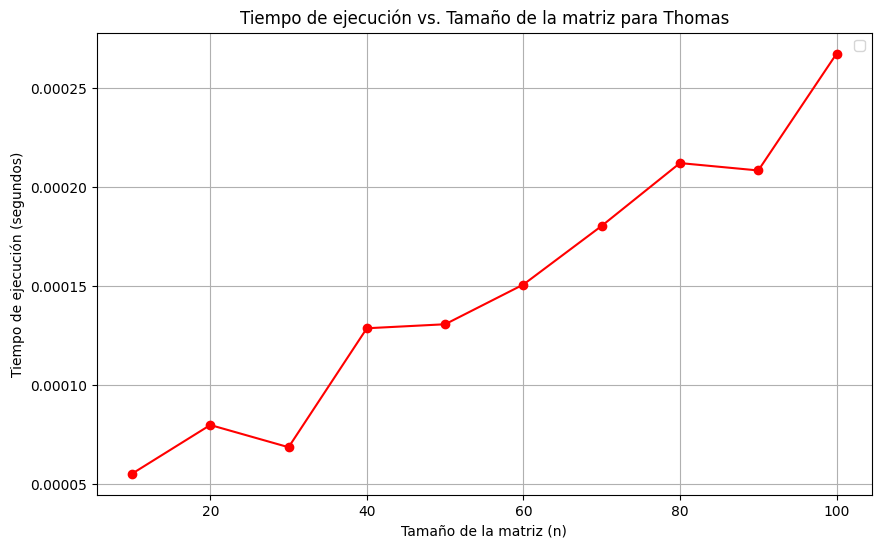

In [19]:
funcion = 'Thomas'

tamaños = []
tiempos = []
for n in range(10, 101, 10):
    try:
        t = Tiempo(funcion, n)
        tamaños.append(n)
        tiempos.append(t)
    except Exception:
        tamaños.append(n)
        tiempos.append(None)

plt.figure(figsize=(10, 6))
tamaños_validos = [n for n, t in zip(tamaños, tiempos) if t is not None]
tiempos_validos = [t for t in tiempos if t is not None]
plt.plot(tamaños_validos, tiempos_validos, marker='o', color='red')
plt.xlabel("Tamaño de la matriz (n)")
plt.ylabel("Tiempo de ejecución (segundos)")
plt.title("Tiempo de ejecución vs. Tamaño de la matriz para " + funcion)
plt.legend()
plt.grid(True)
plt.show()